简单线性回归: $Y = a + bX$   
(只有一个自变量的情况称为简单回归，大于一个自变量情况的叫做多元回归)  ,线性回归模型经常用最小二乘j来拟合
线性回归的应用: 流行病学,金融,经济学  
[url ref link](https://zh.wikipedia.org/wiki/%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8)  
[最小二乘](https://zh.wikipedia.org/wiki/%E6%9C%80%E5%B0%8F%E4%BA%8C%E4%B9%98%E6%B3%95)

In [1]:
# %% imports
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


D:\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


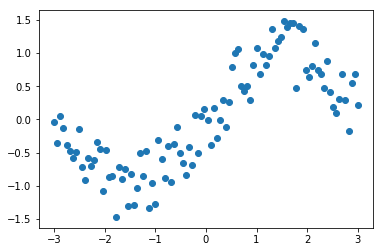

In [2]:
# %% Let's create some toy data
plt.ion()
n_observations = 100
fig, ax = plt.subplots(1, 1)
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [3]:
# %% tf.placeholders for the input and output of the network. Placeholders are
# variables which we need to fill in when we are ready to compute the graph.
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [5]:
# %% We will try to optimize min_(W,b) ||(X*w + b) - y||^2
# The `Variable()` constructor requires an initial value for the variable,
# which can be a `Tensor` of any type and shape. The initial value defines the
# type and shape of the variable. After construction, the type and shape of
# the variable are fixed. The value can be changed using one of the assign
# methods.
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.multiply(X, W), b)

In [6]:
# %% Loss function will measure the distance between our observations
# and predictions and average over them.
cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / (n_observations - 1)

In [7]:
# %% Use gradient descent to optimize W,b
# Performs a single step in the negative gradient
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
# %% We create a session to use the graph
n_epochs = 1000
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    sess.run(tf.initialize_all_variables())

    # Fit all training data
    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(
            cost, feed_dict={X: xs, Y: ys})
        print(training_cost)

        if epoch_i % 20 == 0:
            ax.plot(xs, Y_pred.eval(
                feed_dict={X: xs}, session=sess),
                    'k', alpha=epoch_i / n_epochs)
            fig.show()
            plt.draw()

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
fig.show()


1.43989
1.30686
1.18916
1.08503
0.992879
0.911325
0.839141
0.77524
0.718663
0.668564
0.624192
0.584885
0.550058
0.519194
0.491835
0.467578
0.446063
0.426977
0.410039
0.395001
0.381647
0.369783
0.359238
0.349861
0.341519
0.334094
0.327481
0.321587
0.316332
0.311643
0.307455
0.303713
0.300366
0.29737
0.294686
0.292278
0.290117
0.288175
0.286427
0.284853
0.283433
0.282151
0.280991
0.279942
0.27899
0.278125
0.277339
0.276623
0.27597
0.275373
0.274826
0.274325
0.273865
0.273442
0.273052
0.272693
0.27236
0.272052
0.271767
0.271501
0.271254
0.271024
0.27081
0.270609
0.270421
0.270245
0.27008
0.269925
0.269779
0.269642
0.269512
0.26939
0.269274
0.269165
0.269062
0.268964
0.268871
0.268783
0.268699
0.26862
0.268544
0.268472
0.268404
0.268339
0.268277
0.268218
0.268161
0.268107
0.268056
0.268007
0.26796
0.267916
0.267873
0.267832
0.267794
0.267756
0.267721
0.267687
0.267654
0.267623
0.267594
0.267565
0.267538
0.267512
0.267487
0.267464
0.267441
0.267419
0.267398
0.267378
0.267359
0.267341
0.2673